# Developer Data
### Datensatz um neue Programmierer einzustellen

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("developer_dataset.csv")
#ersten Überblick verschaffen über den Datensatz
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/988095720.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("developer_dataset.csv")


In [12]:
#da viele Columns vorhanden sind, schauen ob auch alle Datensätze gefüllt sind
print(df.count())

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64


In [13]:
#ersten Eindruck über einfache Zusammenfassungen schaffen
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


### Viele Datensätze sind im Schnitt weniger gefüllt als andere.
### Um das Vorhaben einen neuen Programmierer einzustellen, ist es wichtig festzustellen welche Datensätze wichtig für einen sind.
### Im ersten Eindruck scheinen die Columns wichtig zu sein die persönliche Informationen wiedergeben (RespondentID, Year, Country & DevType). Ebenso scheinen die Informationen wichtig zu sein, welche die Erfahrung widerspiegeln (LanguageWorkedWith, DatabaseWorkedWith, UndergradMajor...) und zu guter Letzt die Informationen darüber, was in der Zukunft von Interesse ist (LanguageDesireNextYear, DatabaseDesireNextYear...)
### Im nächsten Schritt werden fehlende Daten bearbeitet

In [14]:
#prozentualen Anteil an fehlenden Daten ausmachen
maxRows = df["RespondentID"].count()

print("% Missing Data:")
print((1-df.count()/maxRows)*100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


In [15]:
#einige Datensätze haben über 60% an fehlenden Daten, weswegen diese entfernt werden

df.drop(["NEWJobHunt", "NEWJobHuntResearch", "NEWLearn"], axis =1, inplace=True)


In [16]:
#des Weiteren gibt es Datensätze mit sehr wenig fehlenden Einträgen, Employment & DevType
#um festzustellen wo die Daten fehlen, tun wir das im Ländervergleich

df[["RespondentID", "Country"]].groupby("Country").count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


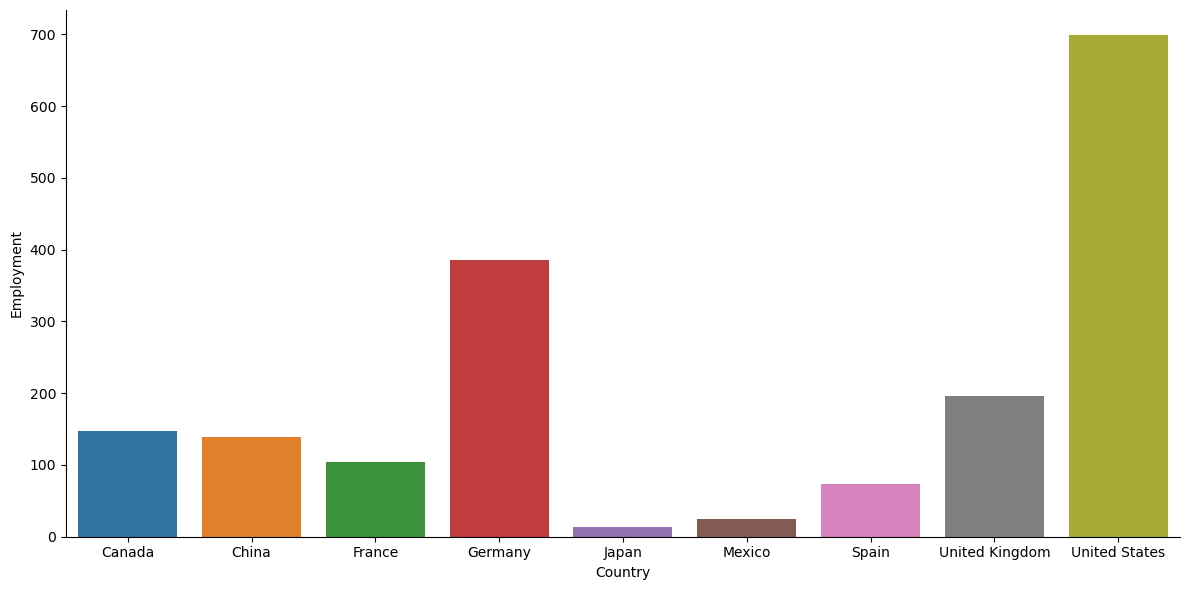

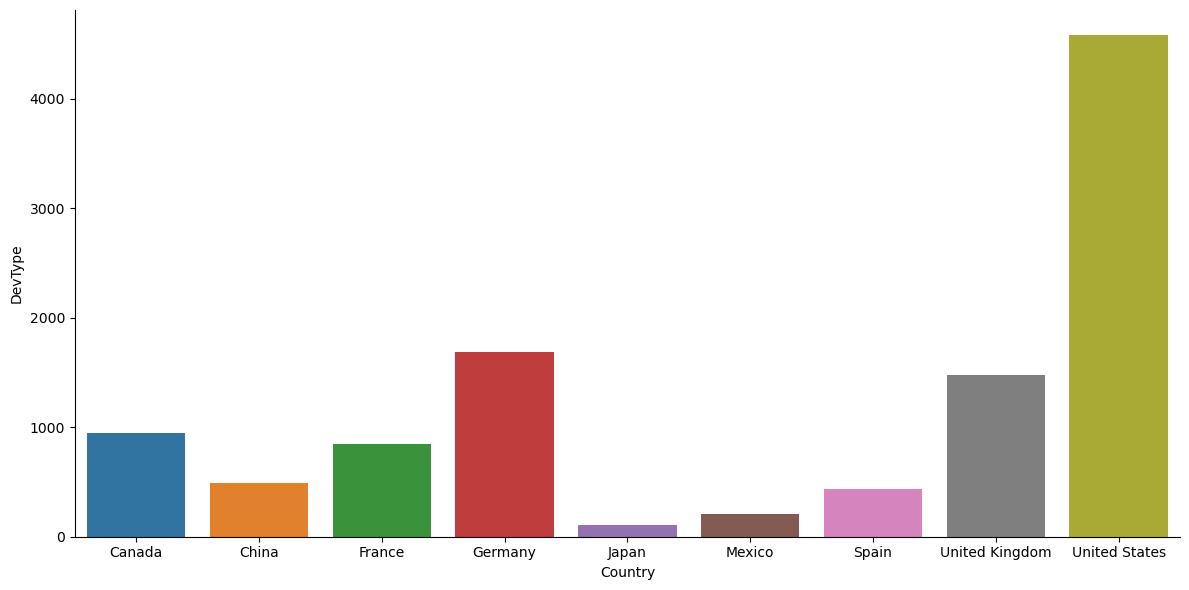

In [17]:
missingData = df[["Employment", "DevType"]].isnull().groupby(df["Country"]).sum().reset_index()

A = sns.catplot(data=missingData, kind="bar", x="Country", y="Employment", height=6, aspect = 2)
B = sns.catplot(data=missingData, kind="bar", x="Country", y="DevType", height=6, aspect = 2)

In [18]:
plt.show()
plt.clf()

### Bedenkt man die relative Größe der verschiedenen Länder, fällt einem auf dass die Daten zeigen, dass kein Land signifikant mehr fehlende Daten aufweisen.
### Da die Daten MCAR sind können die Zeilen mit den fehlenden Daten komplett gelöscht werden

In [19]:
df.dropna(subset = ["Employment", "DevType"], inplace = True, how = "any")

### Als nächstes wird die Verteilung der Anstellungsarten pro Land analysiert. 
### Hierfür werden diese in:
- Front-end
- Back-end
- Full-stack
- Mobile development
- Administration roles
### unterteilt

In [20]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);

devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
devdf.dropna(how='any', inplace=True)
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);


/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1988017441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1988017441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1988017441.py:8: SettingWithCopyWarning: 
A value 

<Figure size 640x480 with 0 Axes>

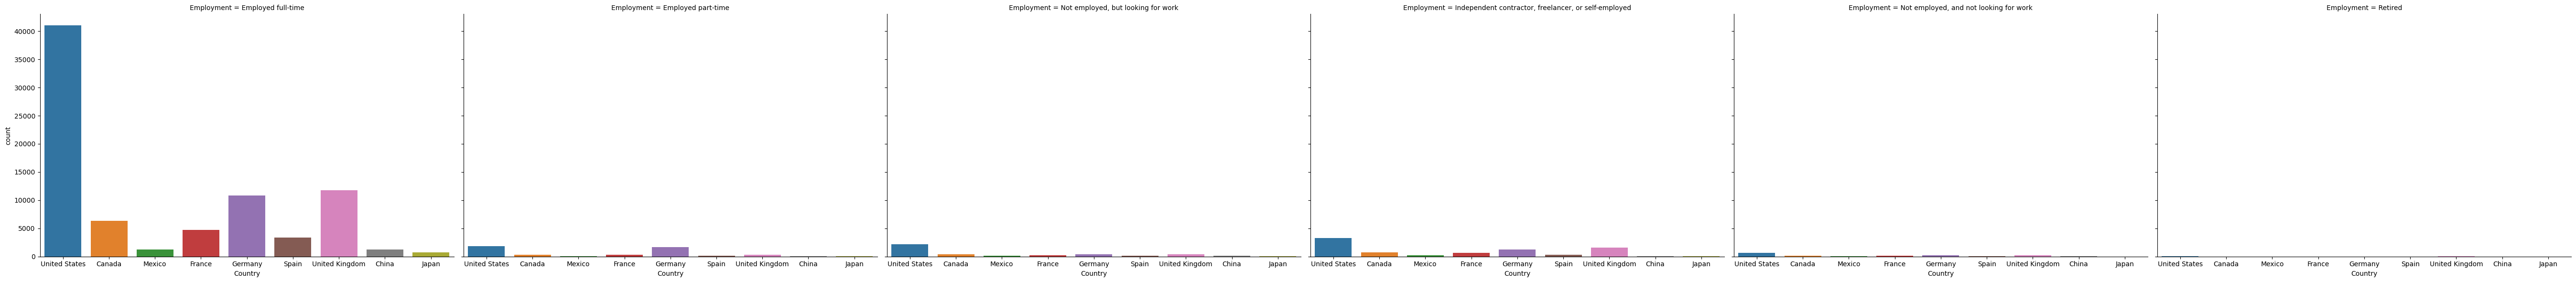

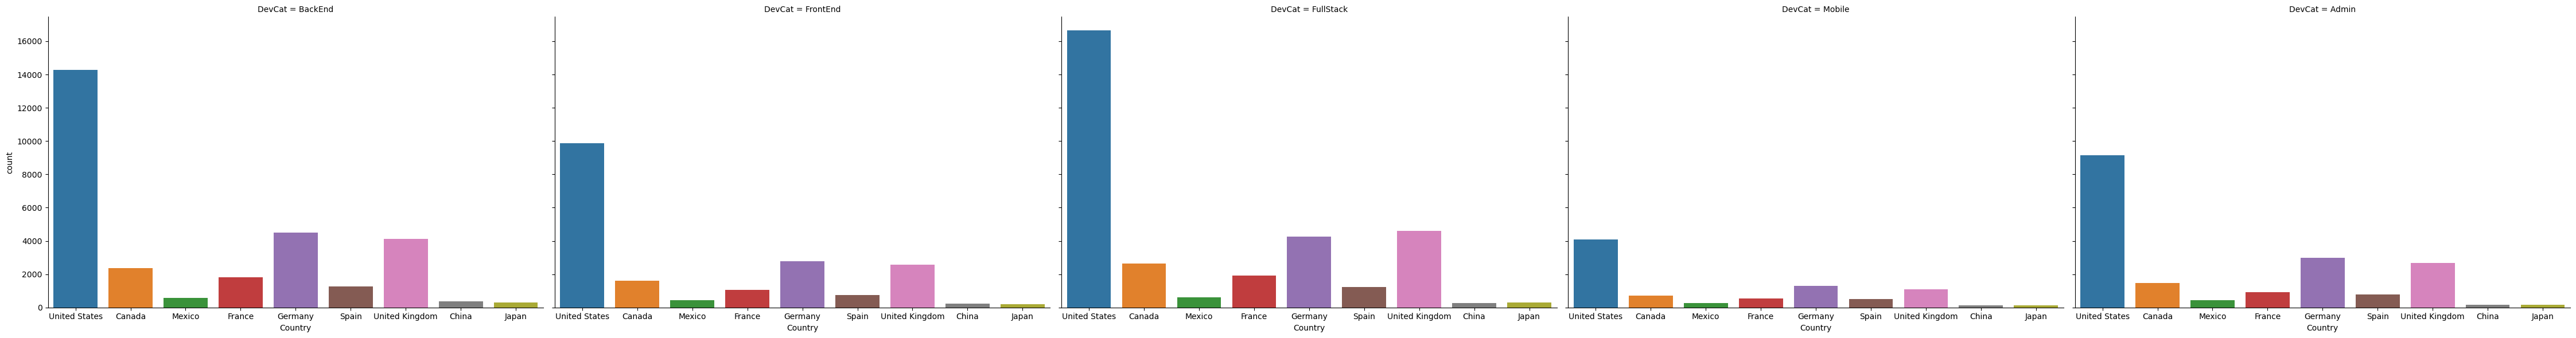

In [21]:
plt.show()
plt.clf()

### Die Datensätze zeigen an, dass die meisten Personen im Datensatz, momentan Vollzeit beschäftigt sind. Damit geht heraus, dass dieser Datensatz hilfreich ist um Arbeitgebern zu verdeutlichen wie der Arbeitsmarkt momentan gestaltet ist. Die meisten Entwickler in diesem Datensatz kommen zudem aus dem Bereich Front-End, Back-End & Full-Stack. 

### Als nächstes werden die Hintergründe analysiert, die zu einer Karriere in die IT geführt haben. Hierfür werden die Abschlüsse der Befragten angeschaut.

In [23]:
# zuerst schauen wir uns aber noch einmal die null-Werte im Undergrad-Major an
missingUndergrad = df["UndergradMajor"].isnull().groupby(df["Year"]).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor", data=missingUndergrad, kind="bar", height=4, aspect=1);

<Figure size 640x480 with 0 Axes>

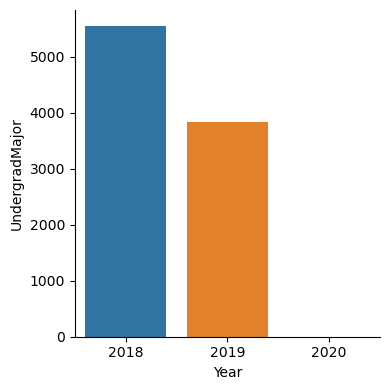

In [24]:
plt.show()
plt.clf()

### Es ist zu erkennen, dass die Daten für 2020 komplett ausgefüllt sind. Dies bedeuetet, dass jeder Befragte eine Art Entscheidung bezüglich ihres Undergrad-Majors getroffen hat.
### Am interessantesten ist es jedoch zu sehen, für welchen Major sich die Befragten letztendlich entschieden haben!

In [32]:
df = df.sort_values(["RespondentID", "Year"])

df["UndergradMajor"].bfill(axis=0, inplace=True)

#Hauptgruppen die in der Stack Overflow Befragung hervorgehoben sind
majors = ["social silence", "natural science", "computer science", "development", "another engineering", "never declared"]

edudf = df[["Year", "UndergradMajor"]]
edudf.dropna(how="any", inplace=True)
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)social science"), "SocialScience"] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)natural science"), "NaturalScience"] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)computer science"), "ComSci"] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)development"), "ComSci"] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)another engineering"), "OtherEng"] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)never declared"), "NoMajor"] = True

edudf= edudf.melt(id_vars=["Year"], value_vars= ["SocialScience", "NaturalScience", "ComSci", "OtherEng", "NoMajor"], var_name="EduCat",value_name="EduFlag")

edudf.dropna(how="any", inplace=True)
edudf = edudf.groupby(["Year", "EduCat"]).count().reset_index()

eduFig = sns.catplot(x="Year", y="EduFlag", col="EduCat", data=edudf, kind="bar", height=6, aspect=1.5);

/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1581301340.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how="any", inplace=True)
/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1581301340.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf["UndergradMajor"].str.contains("(?i)social science"), "SocialScience"] = True
/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1581301340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 640x480 with 0 Axes>

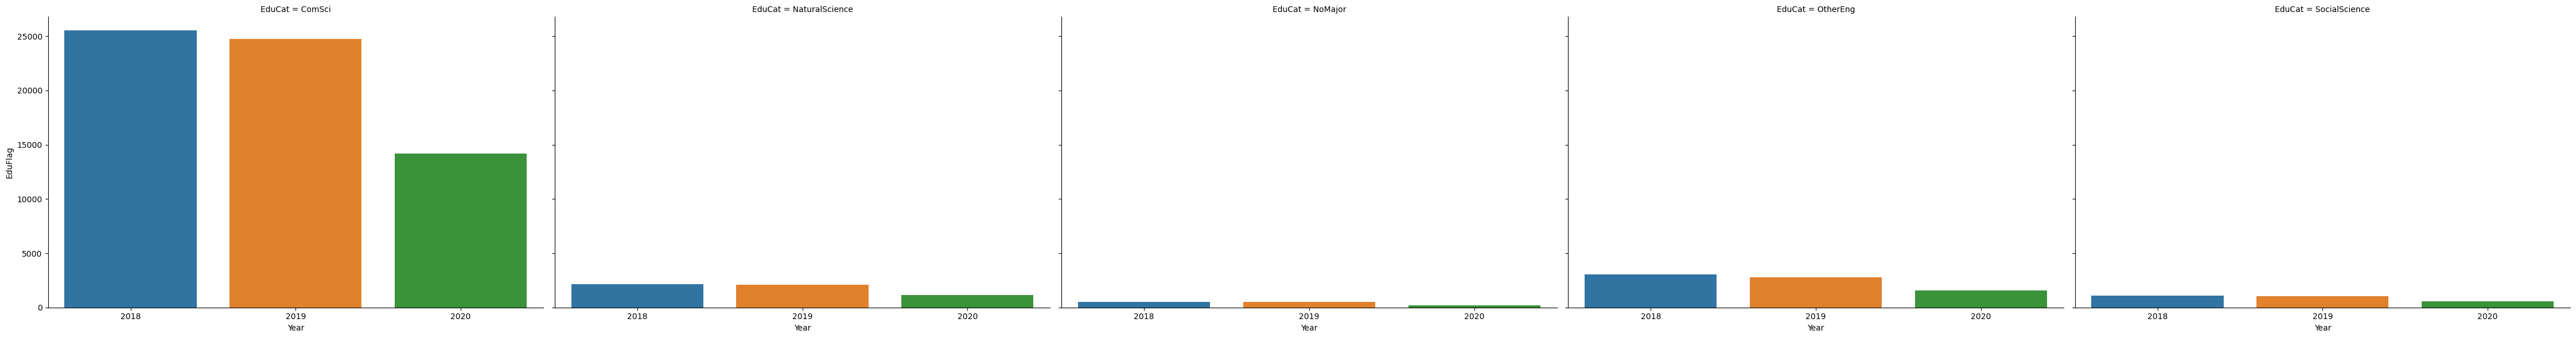

In [33]:
plt.show()
plt.clf()

### Die meisten Leute aus der Umfrage kommen aus der Computer Science. Diese Zahlen sinken aber mit den Jahren. Was darauf hindeutet, dass der Einsteig über verschiedene Laufbahnen immer wahrscheinlicher zu scheinen sind.

### Im nächsten Schritt schauen wir uns das Verhältnis von Arbeitserfahrung zu Kompensation an

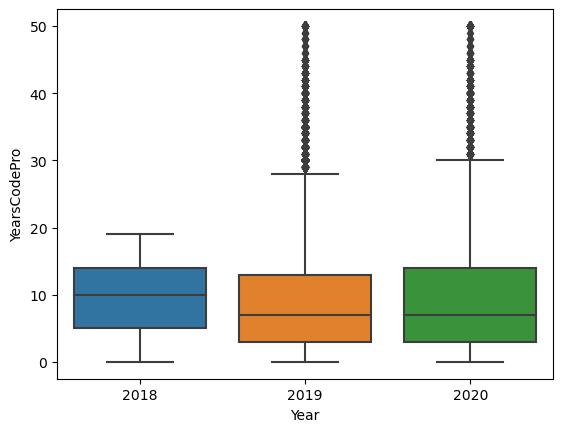

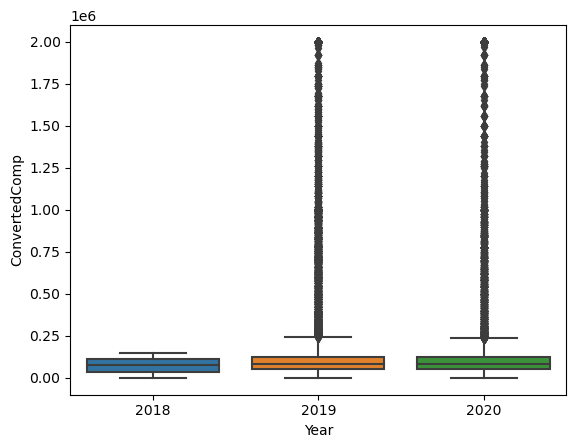

In [36]:
compFields = df[["Year", "YearsCodePro", "ConvertedComp"]]

D = sns.boxplot(x="Year", y="YearsCodePro", data =compFields)
plt.show()
plt.clf()
E = sns.boxplot(x="Year", y="ConvertedComp", data= compFields)
plt.show()
plt.clf()

### Auch wenn die Daten einige Ausreißer aufweisen zeigt sich doch, dass eine starke Korrelation vorherrscht

In [37]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[["YearsCodePro", "ConvertedComp"]]

traindf, testdf = train_test_split(imputedf, train_size=0.1)
#IterativeImputer model um missing values zu predicten
imp = IterativeImputer(max_iter=20, random_state=0)

imp.fit(imputedf)

compdf = pd.DataFrame(np.round(imp.transform(imputedf),0),columns=["YearsCodePro", "ConvertedComp"])

/var/folders/h5/g8vwl8hd7g12fkh1n67nrxt00000gn/T/ipykernel_7686/1340390793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf["CodeYearBins"] = pd.qcut(compPlotdf["YearsCodePro"], q=5)


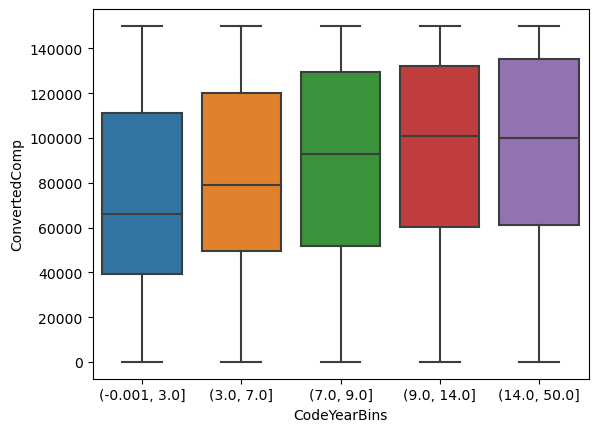

In [38]:
compPlotdf= compdf.loc[compdf["ConvertedComp"]<=150000]
compPlotdf["CodeYearBins"] = pd.qcut(compPlotdf["YearsCodePro"], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp", data=compPlotdf)

plt.show()
plt.clf()

### Die Darstellung verdeutlicht die vorherige Aussage nochmals. Auch wenn es Low- und Top-Verdiener, in jeder Erfahrungsgruppe gibt, scheint die Kompensation an die Arbeitserfahrung gekoppelt zu sein!

## Die Datenanalyse gibt ein gutes Bild darüber ab, was der Arbeitsmarkt in der IT-Community hergibt. Von hieraus kann abgeschätzt werden, was beim Einstellen eines neuen Programmieres zu beachten ist.